In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata

# Brain

In [3]:
pd_atlas = sc.read_h5ad('/Pech_Janssens_PD_atlas/scRNA_PD_annotated.h5ad')

In [4]:
ctrl_young_raw = pd_atlas[(pd_atlas.obs.genotype == 'W1118CS') & (pd_atlas.obs.age == 7)]

In [5]:
df_tmp = ctrl_young_raw.to_df().copy()

df_tmp['Gba1a/b'] = df_tmp['Gba1a'] + df_tmp['Gba1b']
del(df_tmp['Gba1a'])
del(df_tmp['Gba1b'])

df_tmp['Dj-1a/b'] = df_tmp['DJ-1alpha'] + df_tmp['dj-1beta']
del(df_tmp['DJ-1alpha'])
del(df_tmp['dj-1beta'])

/tmp/ipykernel_95935/551316757.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tmp['Dj-1a/b'] = df_tmp['DJ-1alpha'] + df_tmp['dj-1beta']


In [6]:
ctrl_young = anndata.AnnData(df_tmp)
ctrl_young.obs = ctrl_young_raw.obs
sc.pp.normalize_total(ctrl_young, target_sum=1e4)
sc.pp.log1p(ctrl_young)

In [7]:
genes = ['anne',
        'ATP6AP2',
        'Chchd2',
        'Coq2',
        'Dj-1a/b',
        'Rme-8',
        'aux',
        'eIF4G1',
        'HtrA2',
        'Lrrk',
        'park',
        'Pink1',
        'iPLA2-VIA',
        'Rab39',
        'Synj',
        'Vps35',
        'loqs',
        'ntc',
        'CG5608',
        'Vps13',
        'Pu',
        'Gdh',
        'Gba1a/b',
        'Tango14']

## Clustering

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [9]:
df = ctrl_young.to_df()
df['cell_types'] = ctrl_young.obs.final_annotation
df = df.loc[:, genes + ['cell_types']]
df_mean = df.groupby('cell_types').mean()

/tmp/ipykernel_95935/2746216786.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean = df.groupby('cell_types').mean()


In [10]:
from scipy.spatial.distance import pdist

In [11]:
scaler = StandardScaler()
scaler.fit(df_mean)
df_mean_scaled = scaler.transform(df_mean)

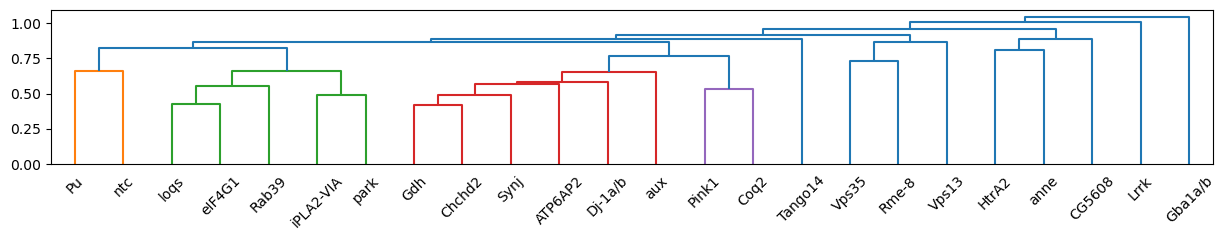

In [12]:
linked_scaled = linkage(pdist(df_mean_scaled.T, metric='correlation'), method='weighted')
plt.figure(figsize=(15, 2))
dend = dendrogram(linked_scaled, orientation='top', distance_sort='descending', show_leaf_counts=True, labels=df_mean.columns)
plt.show()

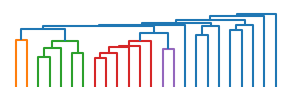

In [13]:
scaler = StandardScaler()
scaler.fit(df_mean)
df_mean_scaled = scaler.transform(df_mean)

linked_scaled = linkage(pdist(df_mean_scaled.T, metric='correlation'), method='weighted')
plt.figure(figsize=(3.5, 1))
plt.axis("off")
dend = dendrogram(linked_scaled, orientation='top', distance_sort='descending', show_leaf_counts=True, labels=df_mean.columns)
plt.savefig('/plots/hierarchical_clustering_correlation_distance_weighted.pdf')


In [14]:
order = dend['ivl']

## Plot expressions

In [15]:
shorter_names = {'Ensheathing_glia': 'Ensh',
                 'dorsal_Fan-shaped_Body_A': 'dFB-A',
                 'dorsal_Fan-shaped_Body_B': 'dFB-B',
                 'Perineurial_glia': 'PNG'}

In [16]:
ctrl_young.obs = pd.DataFrame(ctrl_young.obs['final_annotation'].map(shorter_names).fillna(ctrl_young.obs['final_annotation']))

In [17]:
cts = [ct for ct in ctrl_young.obs.final_annotation[~ctrl_young.obs.final_annotation.str.contains('^[1-9]')].unique()]
cts

['Ensh',
 'A_Bp-KC',
 'G-KC',
 'Pm2',
 'Mi4',
 'C2',
 'T1',
 'A_B-KC',
 'Dm2',
 'TmY14p',
 'Serotonergic',
 'Tm9',
 'Tm1',
 'OPN',
 'Astrocyte-like',
 'Plasmatocytes',
 'T4_T5',
 'Tm2',
 'Dm8',
 'C3',
 'T2',
 'Dm10',
 'TmY5a',
 'LLPC1',
 'Tm5c',
 'LC10b',
 'Mi1',
 'Tm5ab',
 'TmY4p',
 'PB4_5',
 'LPLC1',
 'LC10a',
 'T3',
 'LPi-34',
 'Tm3',
 'LC17p',
 'Lai',
 'TmY8p',
 'LC6',
 'Pm1',
 'DCN',
 'PAM',
 'T2a',
 'Dm3',
 'Mi9',
 'PNG',
 'LPLC2',
 'Tm29',
 'dFB-A',
 'Dm12',
 'Dm9',
 'Tm20',
 'LC12p',
 'L1',
 'TmY3',
 'LPC1',
 'Pm4',
 'IPC',
 'Tm4',
 'Poxn',
 'Chiasm_glia',
 'Mi15',
 'Peptidergic',
 'Cortex_glia',
 'Photoreceptors',
 'Lawf1',
 'Clock_C',
 'LC4',
 'PB_2',
 'Dm11',
 'Lawf2',
 'dFB-B',
 'Clock_B',
 'Tyraminergic',
 'AstA_Nplp1',
 'L2',
 'Dm1',
 'Pdf',
 'PB_1',
 'L3',
 'L5',
 'AstA_NPF']

/home/q019rp/miniforge3/envs/scanpy_1.9.1/lib/python3.10/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/tmp/ipykernel_95935/384899682.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p_axes['color_legend_ax'].set_xticklabels(p_axes['color_legend_ax'].get_xticklabels(), fontsize=6)


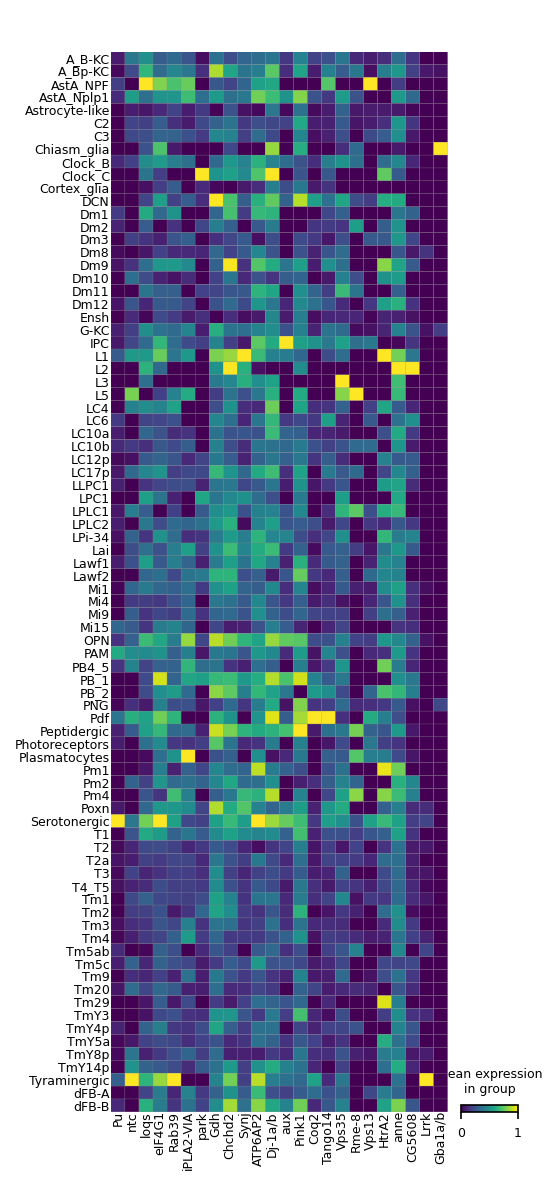

In [19]:
fig, ax = plt.subplots(1,1, figsize=(3.5,9.5), dpi=150)
lw = 0
p = sc.pl.matrixplot(ctrl_young[ctrl_young.obs.final_annotation.isin(cts),],
              groupby='final_annotation', var_names=order,
              dendrogram=False, ax=ax, return_fig=True, standard_scale='var')

p_axes = p.get_axes()
p_axes['mainplot_ax'].set_xticklabels(p_axes['mainplot_ax'].get_xticklabels(), fontsize=6)
p_axes['mainplot_ax'].set_yticklabels(p_axes['mainplot_ax'].get_yticklabels(), fontsize=6)
p_axes['color_legend_ax'].set_xticklabels(p_axes['color_legend_ax'].get_xticklabels(), fontsize=6)
p_axes['color_legend_ax'].set_title(p_axes['color_legend_ax'].get_title(), fontsize=6)

p_axes['mainplot_ax'].spines['top'].set_linewidth(lw)
p_axes['mainplot_ax'].spines['right'].set_linewidth(lw)
p_axes['mainplot_ax'].spines['bottom'].set_linewidth(lw)
p_axes['mainplot_ax'].spines['left'].set_linewidth(lw)
p_axes['mainplot_ax'].tick_params(axis='x', width=lw, length=2.5, pad=-3)
p_axes['mainplot_ax'].tick_params(axis='y', width=lw, length=2.5, pad=-2)


plt.savefig('/plots/gene_expression_matrix_plot_weighted.pdf')

## Plot tSNEs

In [50]:
ctrl_young.obsm['X_tsne'] = ctrl_young_raw.obsm['X_tsne']

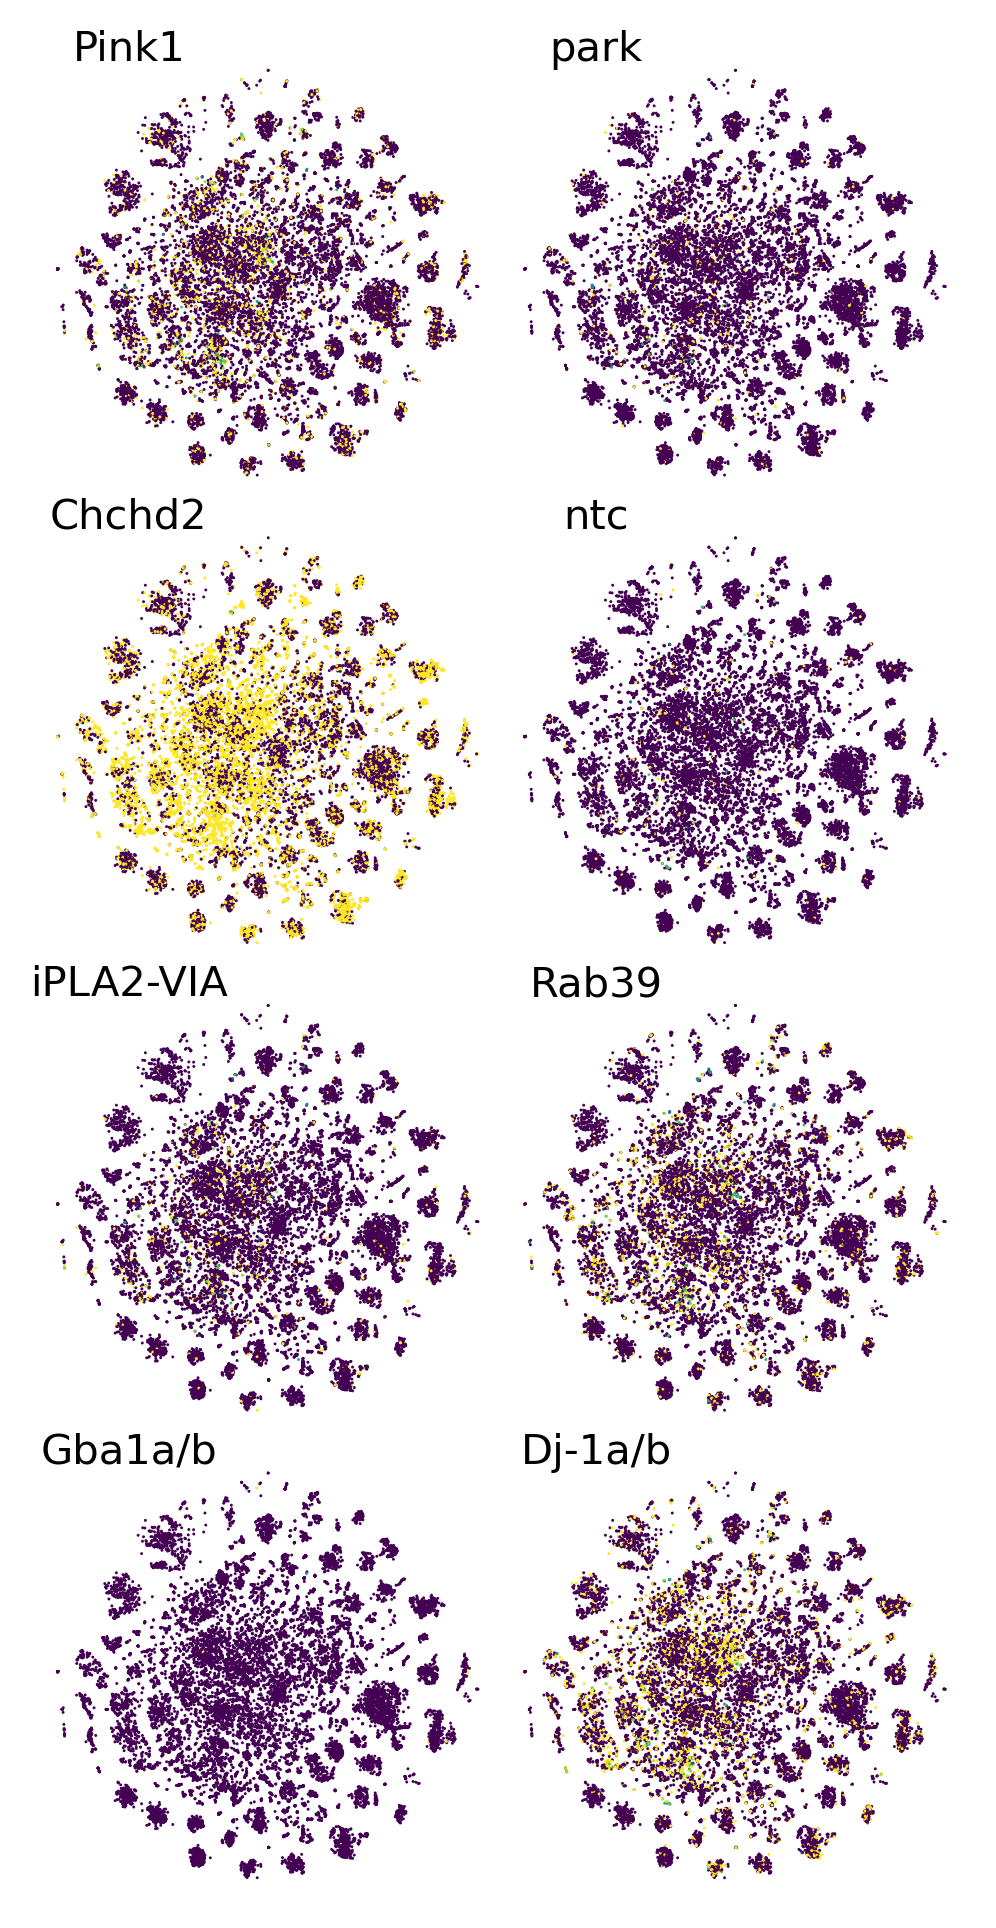

In [51]:
vmax = 1
fig, ax = plt.subplots(4,2, figsize=(4,8), dpi=300)
plt.subplots_adjust(wspace=0.01, hspace=0.05)
ax = ax.flatten()
for i, mg in enumerate(['Pink1', 'park', 'Chchd2', 'ntc', 'iPLA2-VIA', 'Rab39', 'Gba1a/b', 'Dj-1a/b']):
    sc.pl.tsne(ctrl_young, color=mg, size=2, ax=ax[i], sort_order=False, frameon=False, title='', color_map='viridis', 
               vmin=0, vmax=vmax, show=False, colorbar_loc=None)
    ax[i].set_title(mg, fontsize=10, x=0.2, y=0.92, fontname='DejaVu Sans')
plt.savefig('/plots/marker_genes_umap.png')

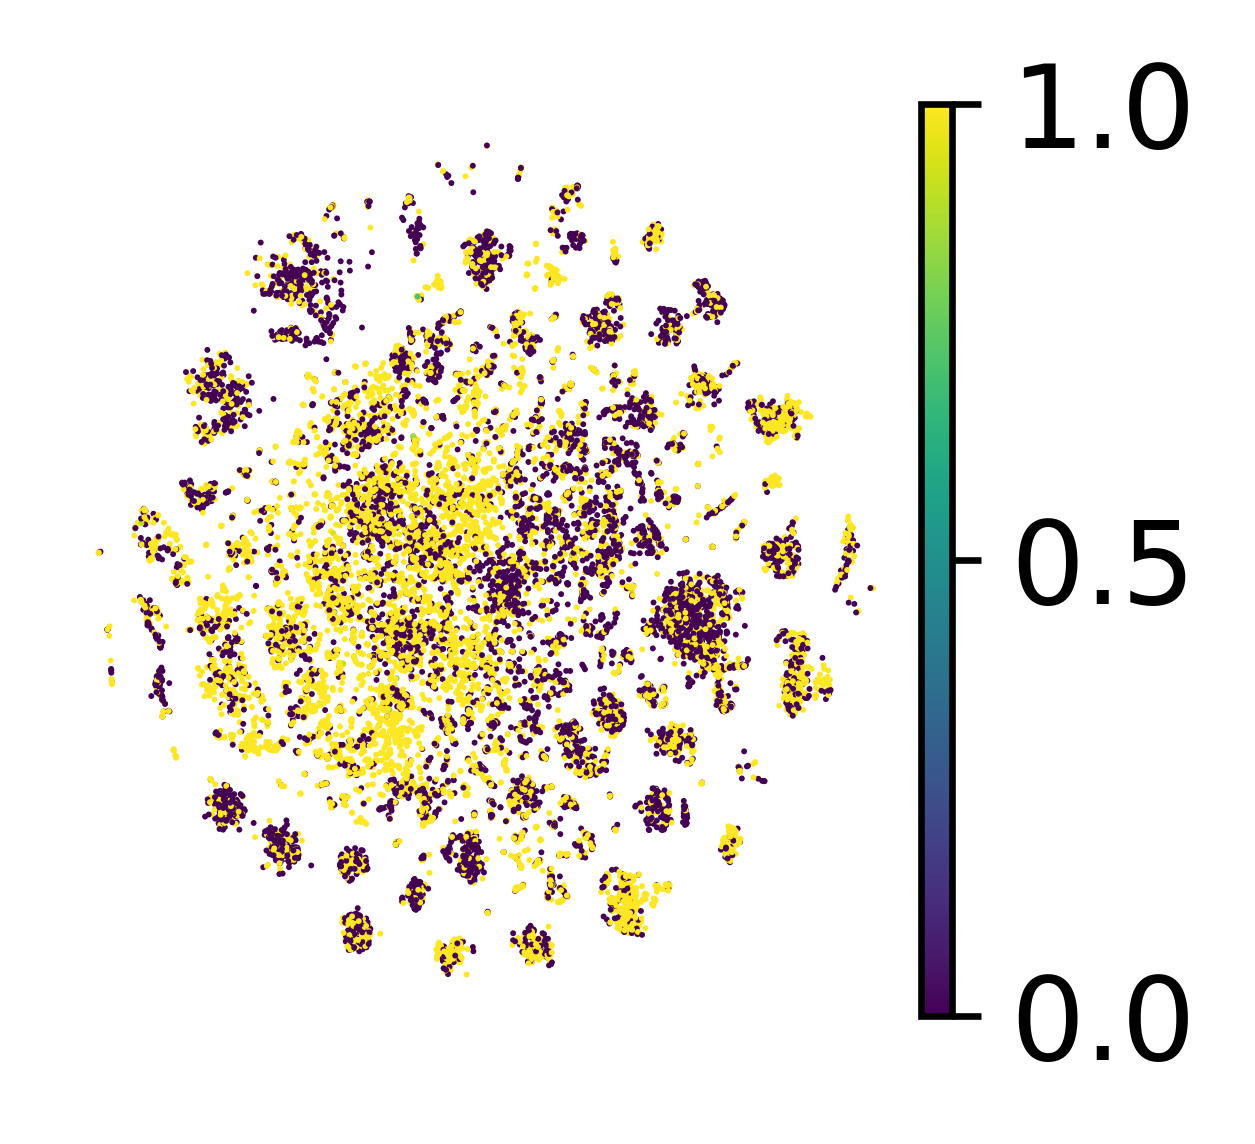

In [48]:
sc.set_figure_params(vector_friendly=True, dpi=300)
vmax = 1
fig, ax = plt.subplots(1,1, figsize=(2,2), dpi=300)
sc.pl.tsne(ctrl_young, color='Chchd2', size=2, ax=ax, sort_order=False, frameon=False, title='', color_map='viridis', 
               vmin=0, vmax=vmax, show=False)
plt.savefig('/plots/colorbar.pdf')



# Body

In [ ]:
body = sc.read_h5ad('/home/q019rp/public_data/flycellatlas/s_fca_biohub_body_10x.h5ad')

In [12]:
body_raw = body.raw.to_adata()

In [14]:
df_tmp = body_raw.to_df().copy()
df_tmp = np.expm1(df_tmp)

df_tmp['Gba1a/b'] = df_tmp['Gba1a'] + df_tmp['Gba1b']
del(df_tmp['Gba1a'])
del(df_tmp['Gba1b'])

df_tmp['Dj-1a/b'] = df_tmp['DJ-1alpha'] + df_tmp['dj-1beta']
del(df_tmp['DJ-1alpha'])
del(df_tmp['dj-1beta'])

body_comb = anndata.AnnData(df_tmp)
body_comb.obs = body.obs
body_comb.obsm = body.obsm
sc.pp.log1p(body_comb)

In [22]:
genes = ['anne',
        'ATP6AP2',
        'Chchd2',
        'Coq2',
        'Dj-1a/b',
        'Rme-8',
        'aux',
        'eIF4G1',
        'HtrA2',
        'Lrrk',
        'park',
        'Pink1',
        'iPLA2-VIA',
        'Rab39',
        'Synj',
        'Vps35',
        'loqs',
        'ntc',
        'CG5608',
        'Vps13',
        'Pu',
        'Gdh',
        'Gba1a/b',
        'Tango14']

## Clustering

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [24]:
df = body_comb.to_df()
df['cell_types'] = body_comb.obs.annotation
df = df.loc[:, genes + ['cell_types']]
df_mean = df.groupby('cell_types').mean()

/tmp/ipykernel_96592/2992282514.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean = df.groupby('cell_types').mean()


In [25]:
from scipy.spatial.distance import pdist

In [26]:
scaler = StandardScaler()
scaler.fit(df_mean)
df_mean_scaled = scaler.transform(df_mean)

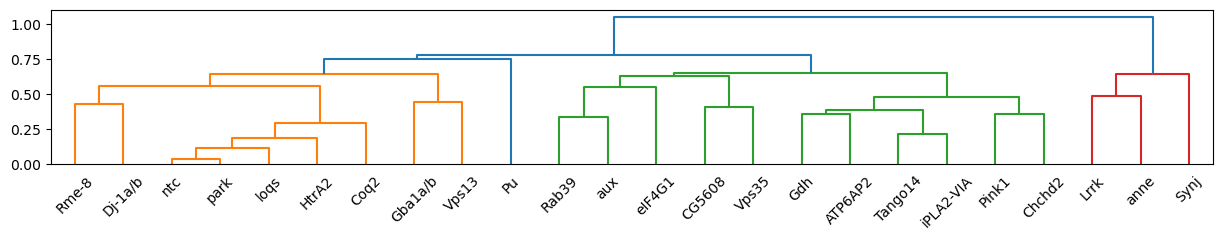

In [27]:
linked_scaled = linkage(pdist(df_mean_scaled.T, metric='correlation'), method='weighted')
plt.figure(figsize=(15, 2))
dend = dendrogram(linked_scaled, orientation='top', distance_sort='descending', show_leaf_counts=True, labels=df_mean.columns)
plt.show()

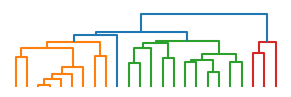

In [28]:
scaler = StandardScaler()
scaler.fit(df_mean)
df_mean_scaled = scaler.transform(df_mean)

linked_scaled = linkage(pdist(df_mean_scaled.T, metric='correlation'), method='weighted')
plt.figure(figsize=(3.5, 1))
plt.axis("off")
dend = dendrogram(linked_scaled, orientation='top', distance_sort='descending', show_leaf_counts=True, labels=df_mean.columns)
plt.savefig('/plots/body_hierarchical_clustering_correlation_distance_weighted.pdf')

In [29]:
order = dend['ivl']

## Plot expressions

/tmp/ipykernel_96592/4099435426.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p_axes['color_legend_ax'].set_xticklabels(p_axes['color_legend_ax'].get_xticklabels(), fontsize=6)


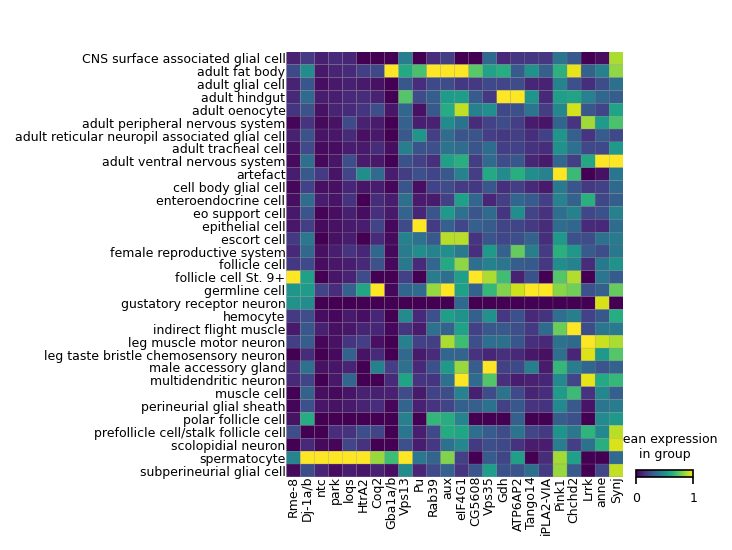

In [30]:
fig, ax = plt.subplots(1,1, figsize=(3.5,4), dpi=150)
lw = 0
p = sc.pl.matrixplot(body_comb[body.obs.annotation != 'unannotated',:],
              groupby='annotation', var_names=order,
              dendrogram=False, ax=ax, return_fig=True, standard_scale='var')

p_axes = p.get_axes()
p_axes['mainplot_ax'].set_xticklabels(p_axes['mainplot_ax'].get_xticklabels(), fontsize=6)
p_axes['mainplot_ax'].set_yticklabels(p_axes['mainplot_ax'].get_yticklabels(), fontsize=6)
p_axes['color_legend_ax'].set_xticklabels(p_axes['color_legend_ax'].get_xticklabels(), fontsize=6)
p_axes['color_legend_ax'].set_title(p_axes['color_legend_ax'].get_title(), fontsize=6)

p_axes['mainplot_ax'].spines['top'].set_linewidth(lw)
p_axes['mainplot_ax'].spines['right'].set_linewidth(lw)
p_axes['mainplot_ax'].spines['bottom'].set_linewidth(lw)
p_axes['mainplot_ax'].spines['left'].set_linewidth(lw)
p_axes['mainplot_ax'].tick_params(axis='x', width=lw, length=2.5, pad=-3)
p_axes['mainplot_ax'].tick_params(axis='y', width=lw, length=2.5, pad=-2)


plt.savefig('/plots/body_gene_expression_matrix_plot_weighted.pdf', bbox_inches='tight')